# 🚀 Introduction to LLMs and LangChain

Welcome to this introductory notebook on Large Language Models (LLMs) and LangChain! In this tutorial, we'll explore the basics of working with LLMs using the LangChain framework.

## 📚 What we'll cover:
1. Basic system testing
2. Exploring available LLMs in LangChain
3. Setting up and using a Hugging Face model with LangChain
4. Creating a simple story generation chain

Let's get started! 🎉

## 1️⃣ System Testing

First, let's make sure our Python environment is working correctly.

In [3]:
# A simple print statement to test our Python environment
print("Hello World!")

Hello World!


## 2️⃣ LangChain Testing

Now, let's explore what LLMs are available in our LangChain installation.

In [4]:
from langchain import llms
import inspect

# Get all classes in the llms module
llm_classes = inspect.getmembers(llms, inspect.isclass)

# Print the names of the LLM classes
for name, _ in llm_classes:
    print(name)

# Note: The output might not show specific LLMs. This is because LangChain acts as an interface
# to various LLMs rather than implementing them directly.

Any
BaseLLM
LangChainDeprecationWarning


## 3️⃣ Setting Up a Hugging Face Model

Let's set up a small model from Hugging Face to use with LangChain. We'll use the GPT-2 model as an example.

In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.prompts import PromptTemplate
from langchain_huggingface import HuggingFacePipeline
from langchain.schema import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

# Suppressing annoying future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def setup_huggingface_llm(model_name="gpt2"):
    """Set up a Hugging Face model for use with LangChain."""
    # Check if CUDA (GPU) is available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

    # Set pad_token_id to eos_token_id if not set
    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    # Create a text-generation pipeline
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_length=100,
        temperature=0.7,
        top_p=0.95,
        repetition_penalty=1.15,
        device=0 if device == "cuda" else -1,  # Use GPU if available
        truncation=True,
        clean_up_tokenization_spaces=False
    )

    # Create LangChain LLM
    return HuggingFacePipeline(pipeline=pipe)

Now that we've set up our model, let's use it to generate some text! 

Note that this direct approach to generating text is relatively simple. In the next section, we'll explore a more sophisticated method using LangChain's pipeline/chain structure, which offers greater flexibility and control over the generation process.

In [6]:
# Set up the LLM
llm = setup_huggingface_llm()

# Use the LLM to generate text
prompt = "Once upon a time, in a land far away,"
response = llm.invoke(prompt)

print(f"Prompt: {prompt}")
print(f"Response: {response}")

# Note: The generated text might not always make perfect sense, especially with smaller models like GPT-2.

Using device: cuda
Prompt: Once upon a time, in a land far away,
Response: Once upon a time, in a land far away, there existed an army of men who were called the Romans. The troops that had been sent to fight against them are said by those people to have fallen into their hands; for they say:
"And when we heard about these things our hearts began to tremble and trembling." (Romans 1).

- A great many Christians believe this statement is true on several grounds as well! As stated above, God's Commandment 13 says it


## 4️⃣ Creating a Story Generation Chain

Now, let's use LangChain to create a simple chain for story generation. This demonstrates how we can combine prompts and models in a more structured way.

In [7]:
# Set up the LLM
llm = setup_huggingface_llm()

# Define a template for our story prompt
template = """Complete the following story:

{story_start}
The rest of the story:
"""

prompt = PromptTemplate(template=template, input_variables=["story_start"])

# Create a chain using the new LangChain method
chain = (
    {"story_start": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Run the chain to generate a story
result = chain.invoke("Once upon a time, in a forest filled with magical creatures,")
print("\nGenerated Story:")
print(result)

# Note: The generated story might be short or incomplete due to the model's limitations.

Using device: cuda

Generated Story:
Complete the following story:

Once upon a time, in a forest filled with magical creatures,
The rest of the story:
. . ."- The next morning he woke up and found his father had been dead for nearly an hour now. He hadn't even seen him when she'd called out to see if anything was wrong or what it meant…but her voice didn`t sound like one that would make anyone doubt their sanity anymore than before."-"I don´m sure there


## 5️⃣ Creating a Nicer User Interface with Gradio

Now, let's use a clean UI to interact with our language chain. We will use Gradio, which is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!
Gradio will create a URL like http://127.0.0.1:7863 to access the interface. However, since the code is running on a remote server, this URL is not directly accessible from our local computer. To make it accessible, we need to enable port forwarding.

*Follow these steps to access the interface from your web browser:*
1. Go to the "PORTS" tab at the bottom of VS Code.
2. Input the port number (in this case, 7863).
3. Click on the browser icon. You will see the interface.

Check out the image for a visual guide:
    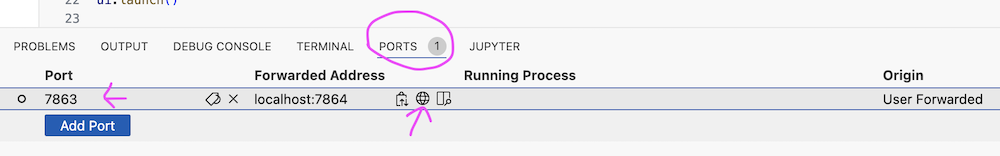


*For those who prefer a command-line option:*
1. Open a new terminal or command prompt window on your local computer.
2. Enter the following command to forward the remote port to a local port:
`ssh -L local_port:127.0.0.1:remote_port -J username@ssh.ist.psu.edu username@i4-cs-gpu01.ist.psu.edu` 
For example, if Gradio is running on 7863 port, my command looks this: `ssh -L 7863:localhost:7863 -J skb5969@ssh.ist.psu.edu skb5969@i4-cs-gpu01.ist.psu.edu`
3. Open your browser, create a new tab, and enter http://127.0.0.1:port (in this case, http://127.0.0.1:7863). You will see the interface.

In [8]:
import gradio as gr

def generate_story(story_start):
    """Generate a story based on the given start."""
    return chain.invoke(story_start)

# Create Gradio interface
ui = gr.Interface(
    fn=generate_story,
    inputs=gr.Textbox(lines=2, placeholder="Enter the start of your story here..."),
    outputs="text",
    title="LangChain Story Generator",
    description="Enter the beginning of a story, and the AI will complete it for you!",
    examples=[
        ["Once upon a time, in a magical forest,"],
        ["In a galaxy far, far away,"],
        ["On a dark and stormy night,"]
    ]
)

# Launch the interface
ui.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## 🎓 Conclusion

Congratulations! You've just taken your first steps into the world of ChatBots using LLMs, LangChain, and Gradio. Here's what we've covered:

1. We verified our Python environment.
2. We explored the LLMs available in our LangChain installation.
3. We set up a Hugging Face model (GPT-2) to use with LangChain.
4. We used the model to generate text directly and as part of a story generation chain.
5. We used a nicer interface to interact with the model.

Remember, this is just the beginning! LangChain offers many more features and possibilities for working with LLMs. As you continue your journey, you'll discover how to create more complex chains, use different models, and build sophisticated AI applications.

Happy coding! 🚀🐍